In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
data=pd.read_csv("mlfolder/CSV_Files/data.csv") # read data from csv file

In [3]:
data.head()

,target,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# A
* There is no missing data checked through np.sum(data1.isna())
* Target data is Categorical data and features data is numerical data
* So Data to be encoded is target, data is encoded using Label Encoder
* Data is scaled using StandardScaler

In [4]:
np.sum(data.isna()) # check for null values

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


target    0
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
f29       0
f30       0
dtype: int64

In [5]:
data1=data.dropna() # if there are anu null values drop those data

In [6]:
data1.dtypes # check for any categorical data types

target     object
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64
f12       float64
f13       float64
f14       float64
f15       float64
f16       float64
f17       float64
f18       float64
f19       float64
f20       float64
f21       float64
f22       float64
f23       float64
f24       float64
f25       float64
f26       float64
f27       float64
f28       float64
f29       float64
f30       float64
dtype: object

In [7]:
target=data1['target'] #target data

In [8]:
encoder=LabelEncoder() #using encoder to encode target data
encoded_target=encoder.fit_transform(target)

In [9]:
encoded_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [10]:
X=data1.drop('target',axis=1) 
y=encoded_target

In [11]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaledX=pd.DataFrame(scaled_X)

<Axes: >

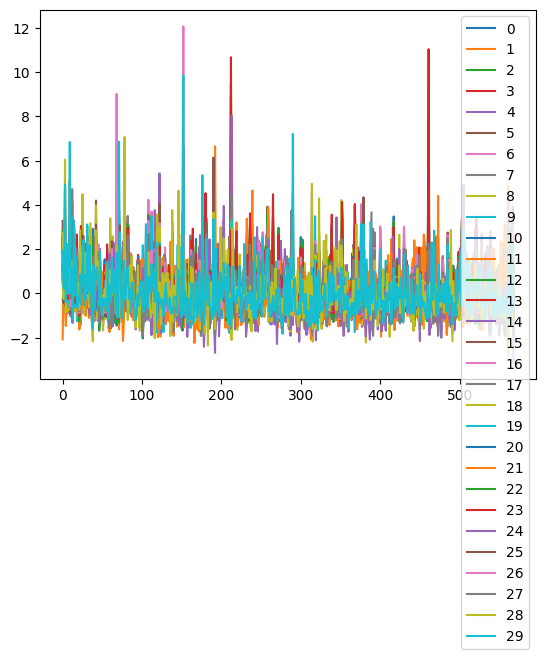

In [12]:
scaledX.plot()

# C

In [13]:
X=scaledX
y=encoded_target

In [14]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,stratify=y,random_state=104)

In [15]:
model_LR=LogisticRegression(random_state=104)
model_LR.fit(Xtrain,ytrain)

LogisticRegression(random_state=104)

In [16]:
predicted_LR=model_LR.predict(Xtest)

In [17]:
print("Report: ",metrics.classification_report(ytest,predicted_LR))

Report:                precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# E

In [18]:
model_pca=PCA(n_components=0.95,random_state=104)
model_pca.fit(Xtrain)

PCA(n_components=0.95, random_state=104)

In [19]:
model_pca.n_components_

np.int64(10)

**To get 95% variance 10 components are needed**

**F**

In [20]:
Xtrain_transformed=model_pca.transform(Xtrain)
Xtest_transformed=model_pca.transform(Xtest)

In [21]:
Xtrain_transformed.shape

(455, 10)

In [22]:
Xtest_transformed.shape

(114, 10)

In [23]:
Xtrain.shape

(455, 30)

In [24]:
model_LR.fit(Xtrain_transformed,ytrain)

LogisticRegression(random_state=104)

In [25]:
predicted2=model_LR.predict(Xtest_transformed)

In [26]:
print("Report after Feature Reduction")
print(metrics.classification_report(ytest,predicted2))

Report after Feature Reduction
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [27]:
print("Report using Logistic Regression without reducing features")
print(metrics.classification_report(ytest,predicted_LR))

Report using Logistic Regression without reducing features
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



* **After Reducing Features to 10(95% variance) and before reducing features(initial 30 features) provides the same classification_report i.e same accuracy,precision,recall**
* we are not dropping data.we are just decomposing data into 10 components

**g**

In [28]:
data2=pd.read_csv("mlfolder/CSV_Files/new_data.csv")

In [29]:
data2.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,20.01,29.02,133.50,1229.0,0.1563,0.38350,0.54090,0.18130,0.4863,0.08633
1,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,15.89,30.36,116.20,799.6,0.1446,0.42380,0.51860,0.14470,0.3591,0.10140
2,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,...,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
3,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025
4,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,...,13.10,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408


In [30]:
X2=data2[:]

In [31]:
X2_transformed=model_pca.transform(X2)

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [32]:
X2_transformed.shape

(6, 10)

In [33]:
predictions_newdata=model_LR.predict(X2_transformed)

In [34]:
predictions_newdata

array([1, 1, 1, 1, 1, 1])

In [35]:
encoder.inverse_transform(predictions_newdata)

array(['M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [36]:
model_pca.explained_variance_ratio_

array([0.44182862, 0.18403791, 0.0955331 , 0.07076544, 0.05463306,
       0.04107888, 0.02441812, 0.01570321, 0.01372015, 0.01215318])

In [37]:
model_LR.score(Xtest_transformed,ytest)

0.9736842105263158

**h**
* if Malignant 'M' is actual but model predicts as Beningn 'B' it means in this case False Negatives are costly we need to have high recall
* if 'B' is actual and model predicts as 'M' --> False Positives are costly we need to choose high precision(when compared to previous case i.e M classified as B this case has less priority)
* also check for probabilities, if the probability is more for 'M' then it is Malignant and vice versa
* if both probabilities are of similar value then run advanced tests on the patients

In [38]:
model_LR.predict_proba(X2_transformed)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

this model predicts probability for M as 1 and B as 0